# 1. Understanding the Data

In [3]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)

In [5]:
#import the data
data = pd.read_csv("bike_sales_india.csv")

In [7]:
#data dimensions and column
print("Data Shape: ", data.shape,"\n Columns: ",data.columns)

Data Shape:  (10000, 15) 
 Columns:  Index(['State', 'Avg Daily Distance (km)', 'Brand', 'Model', 'Price (INR)',
       'Year of Manufacture', 'Engine Capacity (cc)', 'Fuel Type',
       'Mileage (km/l)', 'Owner Type', 'Registration Year', 'Insurance Status',
       'Seller Type', 'Resale Price (INR)', 'City Tier'],
      dtype='object')


In [9]:
data.head()

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

In [13]:
data.describe()

,Avg Daily Distance (km),Price (INR),Year of Manufacture,Engine Capacity (cc),Mileage (km/l),Registration Year,Resale Price (INR)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,42.533128,224328.722400,2019.510500,552.695300,67.188926,2020.96510,133828.973998
std,21.676985,100753.660447,2.907668,261.176292,20.891728,2.74897,66613.220382
min,5.010000,50031.000000,2015.000000,100.000000,25.000000,2015.00000,20532.070000
25%,23.907500,137900.250000,2017.000000,327.000000,50.680000,2019.00000,78680.905000
50%,42.480000,223878.000000,2019.000000,553.000000,69.850000,2022.00000,128148.340000
75%,61.352500,311464.250000,2022.000000,780.000000,84.542500,2023.00000,181048.192500
max,80.000000,399981.000000,2024.000000,1000.000000,100.000000,2024.00000,317302.450000


# 2. Clean the Data

In [16]:
#check null values
data.isnull().sum()

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

In [18]:
#remove duplicates and unwanted columns
data.drop_duplicates(inplace=True)
data.shape
data.drop(columns=["Avg Daily Distance (km)","Insurance Status","City Tier"],inplace=True)

In [20]:
data.rename(columns={"Price (INR)":"Price","Engine Capacity (cc)": "Engine Capacity", "Mileage (km/l)":"Mileage","Resale Price (INR)":"Resale Price"}, inplace=True)
num_cols = ['Price', 'Year of Manufacture',
       'Engine Capacity', 'Mileage','Registration Year','Resale Price']

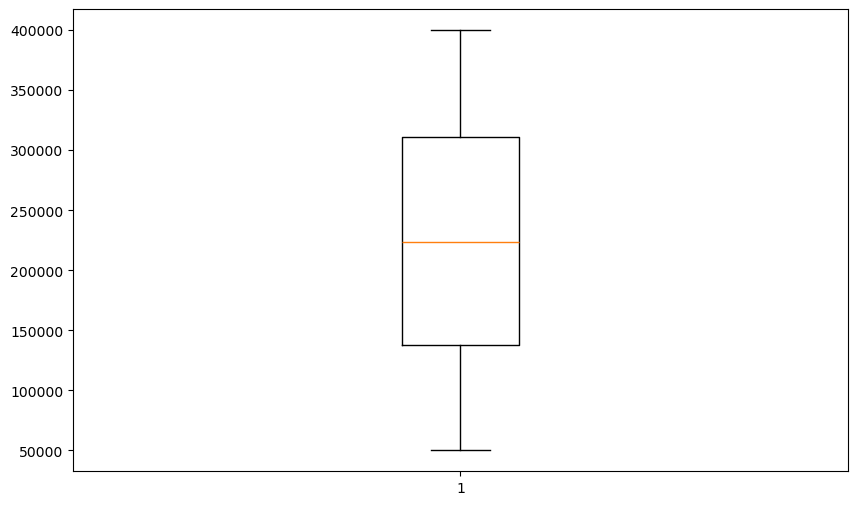

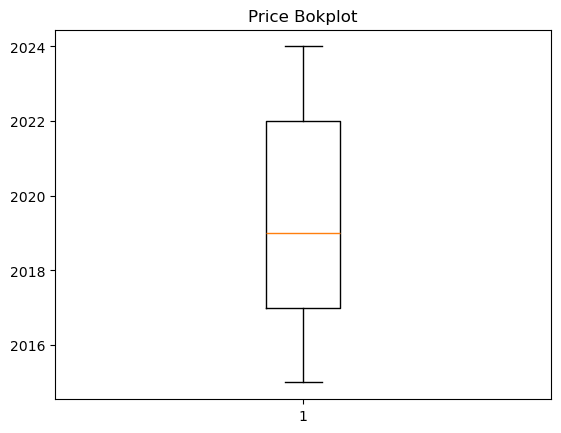

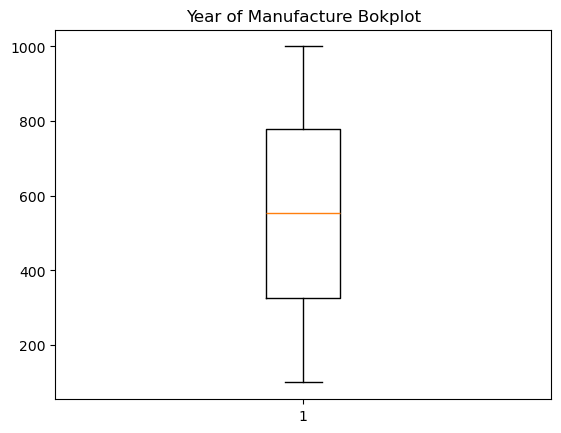

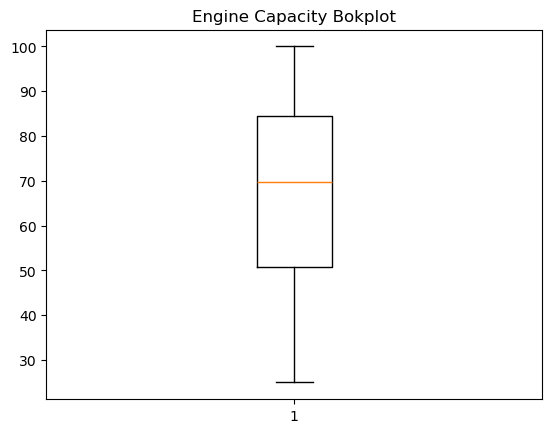

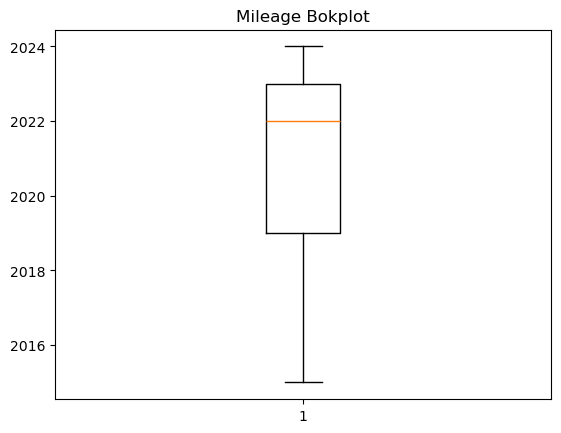

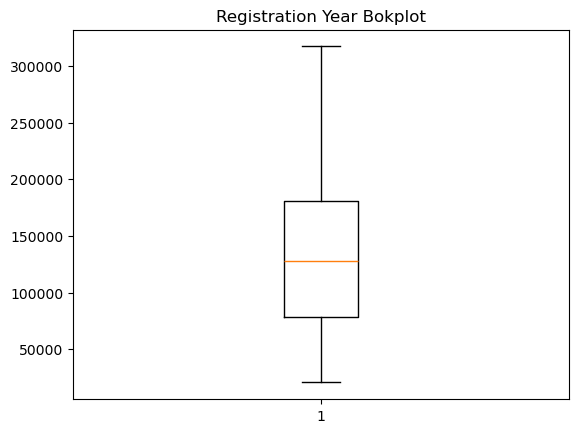

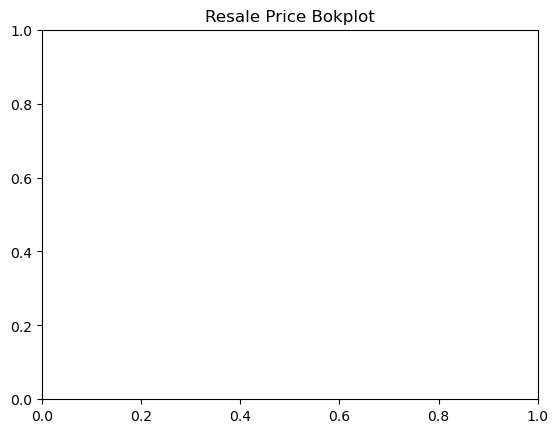

In [22]:
#checking outliers
plt.figure(figsize=(10,6))
for var in num_cols:
    plt.boxplot(data[var])
    plt.show()
    plt.title(var+" Bokplot")

# 3. Analysis

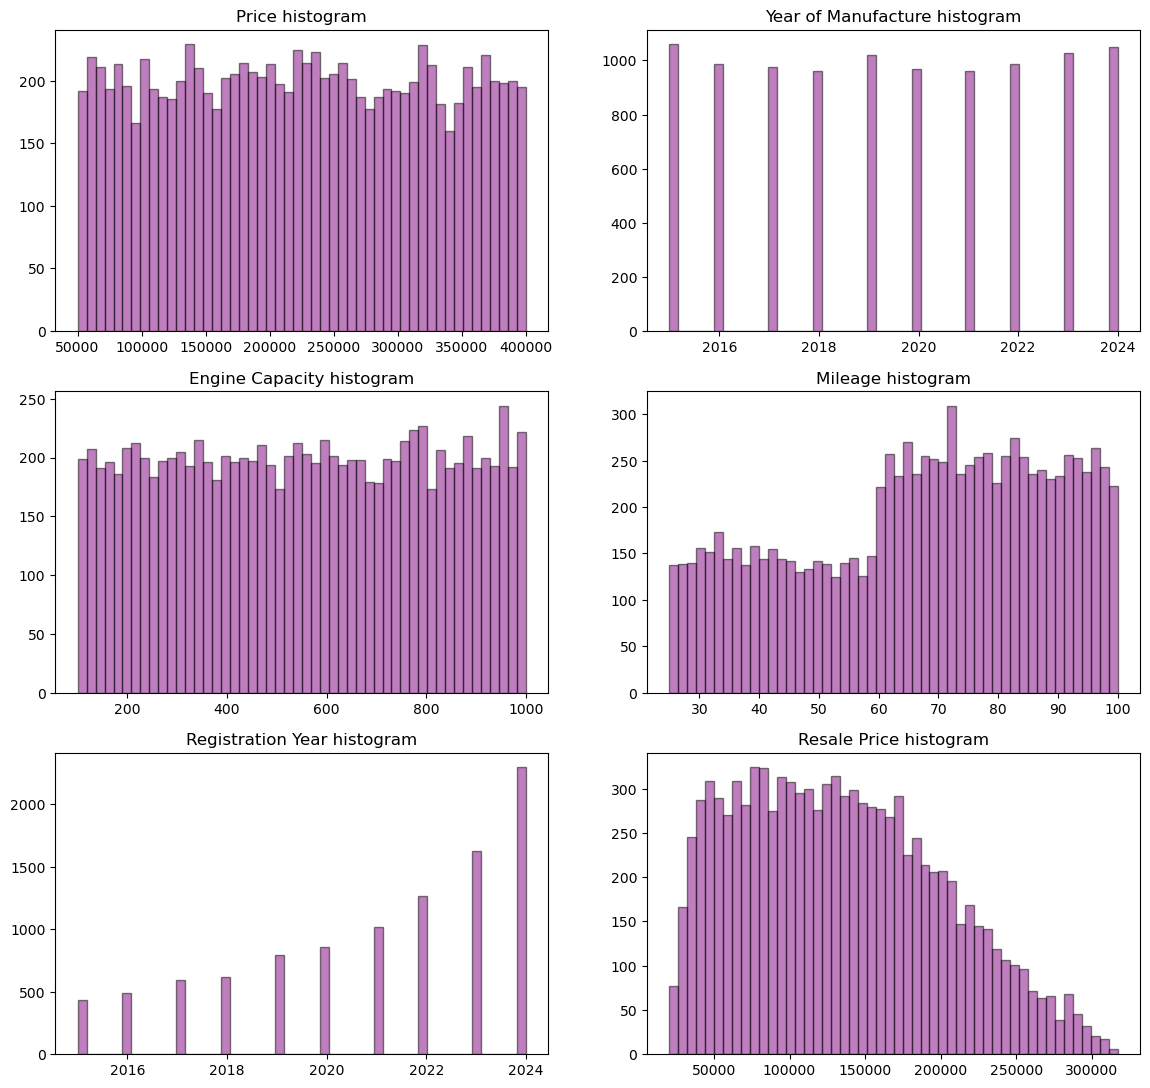

In [25]:
i = 1
plt.figure(figsize=(14,18))
for item in num_cols:
    plt.subplot(4,2,i)
    i += 1
    plt.hist(data[item],bins=50,color="purple",label=item,edgecolor="black",alpha=.5)
    plt.title(item+" histogram")
plt.show()

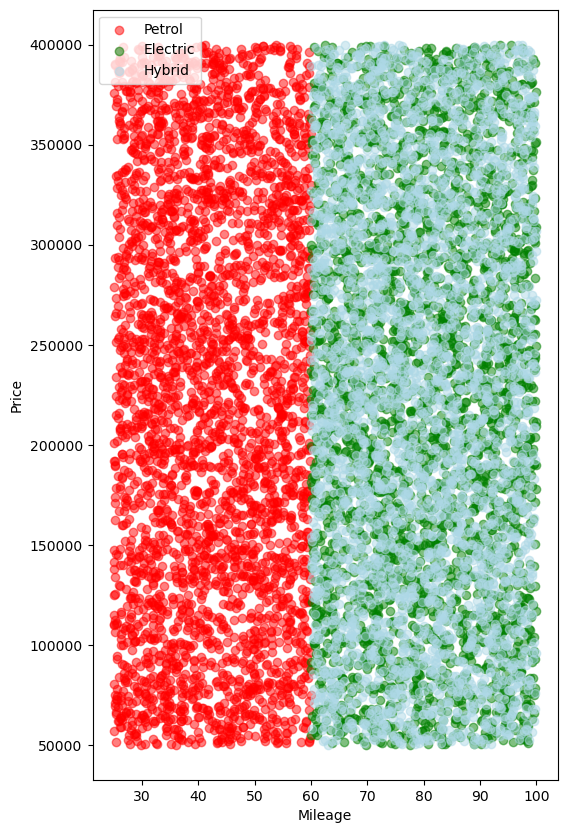

In [67]:
plt.figure(figsize=(6,10))
plt.scatter(y=data[data["Fuel Type"]=="Petrol"]["Price"],x=data[data["Fuel Type"]=="Petrol"]["Mileage"],c="red",alpha=.5,label="Petrol")
plt.scatter(y=data[data["Fuel Type"]=="Electric"]["Price"],x=data[data["Fuel Type"]=="Electric"]["Mileage"],c="green",alpha=.5,label="Electric")
plt.scatter(y=data[data["Fuel Type"]=="Hybrid"]["Price"],x=data[data["Fuel Type"]=="Hybrid"]["Mileage"],c="lightblue",alpha=.5,label="Hybrid")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()

In [69]:
data1 = data[["Registration Year", "State", "Brand"]]
data1.groupby(["Brand"])["State"].value_counts().unstack().fillna(0).astype(int)

State,Delhi,Gujarat,Karnataka,Madhya Pradesh,Maharashtra,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,West Bengal
Brand,,,,,,,,,,
Bajaj,118,118,123,110,144,140,130,102,118,104
Hero,139,113,117,118,113,119,120,128,134,138
Honda,105,133,118,123,133,125,120,122,126,116
KTM,139,137,113,99,134,147,140,114,125,124
Kawasaki,96,133,154,138,134,109,128,146,131,122
Royal Enfield,132,121,122,127,116,144,122,132,131,106
TVS,121,119,109,125,131,133,139,114,116,127
Yamaha,127,128,126,133,125,134,118,136,122,134


In [37]:
data.Model.unique()

array(['Hunter 350', 'Dominar 400', '125 Duke', 'Ninja 300', 'FZ V3',
       'Splendor Plus', 'Meteor 350', 'Vulcan S', '390 Adventure',
       'HF Deluxe', 'Jupiter', 'Z650', 'Fascino 125', 'Xtreme 160R',
       'Versys 650', 'Glamour', 'MT-15', 'Activa', 'Ray ZR',
       'Avenger 220', 'Passion Pro', 'NTorq 125', 'R15 V4', 'Unicorn',
       'Ronin', 'Platina 110', 'Pulsar 150', 'Duke 200', 'Shine',
       'Classic 350', 'Dio', 'Sport', 'Ninja 400', 'Apache RTR 160',
       'RC 390', 'Interceptor 650', 'CBR 650R', 'CT 100', '250 Duke',
       'Himalayan'], dtype=object)

In [53]:
data1 = data[data["Model"] == "Hunter 350"][["Mileage","Model"]]
data1.groupby(["Model","Mileage"]).value_counts()

Model       Mileage
Hunter 350  25.06      1
            25.57      1
            26.67      1
            26.89      2
            27.66      1
            28.41      1
            29.01      1
            29.19      1
            30.55      1
            32.47      1
            32.59      1
            32.83      2
            32.91      1
            33.45      2
            34.71      1
            35.57      1
            36.01      1
            36.78      1
            36.93      1
            37.19      1
            37.34      1
            37.37      1
            37.55      1
            37.65      1
            38.22      1
            38.71      1
            38.76      1
            39.02      1
            39.46      1
            39.57      1
            39.72      1
            41.09      1
            41.56      1
            41.82      1
            42.05      1
            42.31      1
            42.55      1
            42.74      1
            42.94      1
     

# 4. Conclusion

Inferences
1. Price, Year of Manufacture, and Engine Capacity exhibit a uniform distribution, indicating no particular concentration in specific ranges.
2. A significant majority of bikes have a mileage between 60–100 km/l, compared to fewer in the 30–60 km/l range — suggesting that buyers prioritize fuel efficiency and lower maintenance costs.
3. The data shows a rising trend in the number of bikes over recent years, indicating increased adoption and usage.
4. Resale prices mostly fall between ₹50,000 and ₹1.75 lakhs. However, due to the absence of key factors like bike usage duration and kilometers driven, we cannot draw meaningful conclusions from resale data alone.

Data Inconsistencies
1. Several numerical fields, such as Price and Mileage, show unrealistically uniform distributions.
2. Petrol bikes have a mileage range of 30–60 km/l, while electric and hybrid bikes range from 60–100 km/l, which seems unusually consistent.
3. Overall, mileage for all bike types ranges narrowly between 25–100 km/l, lacking expected variation.
4. These patterns suggest potential data fabrication or poor data collection, making the dataset unreliable for in-depth analysis.